In [101]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
trial_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df=mouse_df.merge(trial_df,on='Mouse ID')


# Display the data table for preview
df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [102]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean=df.groupby(['Drug','Timepoint']).mean()

#Remove Unused Variables
tumor_mean_clean_full=tumor_mean.drop(labels='Metastatic Sites',axis=1)

# Remove Unused Drugs
tumor_data_clean=tumor_mean_clean_full.drop(['Ceftamin','Ramicane','Stelasyn','Zoniferol','Naftisol','Propriva'])


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=df.groupby(['Drug','Timepoint']).sem()
tumor_sem_clean=tumor_sem.drop(labels=['Metastatic Sites','Mouse ID'],axis=1)

# Preview DataFrame
tumor_sem_clean.head()

#Reformat
tumor_error_df=tumor_sem_clean.unstack(level=0)

In [103]:

# Reformat Data
tumor_df=tumor_data_clean.unstack(level=0)
tumor_df.head()

Tumor Volume (mm3)                                 
Drug               Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                                    
0                  45.000000  45.000000  45.000000  45.000000
5                  44.266086  47.062001  47.389175  47.125589
10                 43.084291  49.403909  49.582269  49.423329
15                 42.064317  51.296397  52.399974  51.359742
20                 40.716325  53.197691  54.920935  54.364417

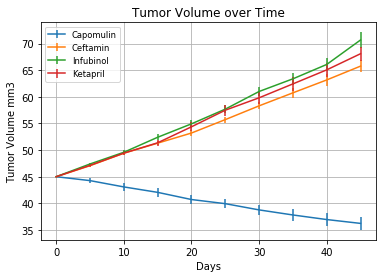

In [100]:
# Generate the Plot (with Error Bars)

tumor_df.plot(yerr=tumor_error_df)
names=df['Drug'].unique()

a=pd.DataFrame(names)
b=a.sort_values(by=0)
b[0]

plt.legend(b[0],loc="upper left", fontsize="small", fancybox=True)

#Chart Formatting 
plt.ylabel('Tumor Volume mm3')
plt.xlabel('Days')
plt.title('Tumor Volume over Time')
plt.grid()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta=df.groupby(['Drug','Timepoint']).mean()

#Remove Unused Variables
mean_meta_clean_full=mean_meta.drop(labels=['Tumor Volume (mm3)'],axis=1)

#Remove Unused Drugs
mean_meta_clean=mean_meta_clean_full.drop(['Ceftamin','Ramicane','Stelasyn','Zoniferol','Naftisol','Propriva'])

In [104]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta=df.groupby(['Drug','Timepoint']).sem()
sem_meta_clean=sem_meta.drop(labels=['Tumor Volume (mm3)','Mouse ID'],axis=1)

#Reformat Data
sem_meta_clean.head()
meta_error_df=sem_meta_clean.unstack(level=0)


In [105]:

# Preview that Reformatting worked
meta_df=mean_meta_clean.unstack(level=0)
meta_df.head()

Metastatic Sites                              
Drug             Capomulin Infubinol  Ketapril   Placebo
Timepoint                                               
0                 0.000000  0.000000  0.000000  0.000000
5                 0.160000  0.280000  0.304348  0.375000
10                0.320000  0.666667  0.590909  0.833333
15                0.375000  0.904762  0.842105  1.250000
20                0.652174  1.050000  1.210526  1.526316

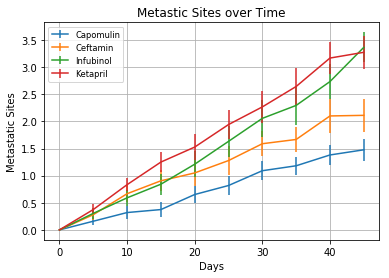

In [106]:
# Generate the Plot (with Error Bars)
meta_df.plot(yerr=meta_error_df)


plt.legend(b[0],loc="upper left", fontsize="small", fancybox=True)

#Chart Formatting 
plt.ylabel('Metastatic Sites')
plt.xlabel('Days')
plt.title('Metastic Sites over Time')
plt.grid()

## Survival Rates

In [107]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse=df.groupby(['Drug','Timepoint']).count()

#Drop Unused Varaibles
count_mouse_clean_full=count_mouse.drop(labels=['Tumor Volume (mm3)','Mouse ID'],axis=1)


# Remove Unused Drugs
count_mouse_clean=count_mouse_clean_full.drop(['Ceftamin','Ramicane','Stelasyn','Zoniferol','Naftisol','Propriva'])

In [108]:
# Minor Data Munging to Re-Format the Data Frames
count_df=count_mouse_clean.unstack(level=0)
count_df.head()


Metastatic Sites                           
Drug             Capomulin Infubinol Ketapril Placebo
Timepoint                                            
0                       25        25       25      25
5                       25        25       23      24
10                      25        21       22      24
15                      24        21       19      20
20                      23        20       19      19

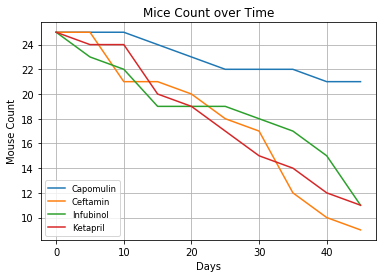

In [110]:
# Generate the Plot (with Error Bars)
count_df.plot()




plt.legend(b[0],loc="lower left", fontsize="small", fancybox=True)

#Chart Formatting 
plt.ylabel('Mouse Count')
plt.xlabel('Days')
plt.title('Mice Count over Time')
plt.grid()

## Summary Bar Graph

In [112]:
# Calculate the percent changes for each drug
per_change=(tumor_df.loc[45]-tumor_df.loc[0])/tumor_df.loc[0]
percent_change=tuple(per_change)

# Display the data to confirm
percent_change

(-0.19475302667894173,
 0.4612347172785187,
 0.5702879468660608,
 0.5129796048315153)

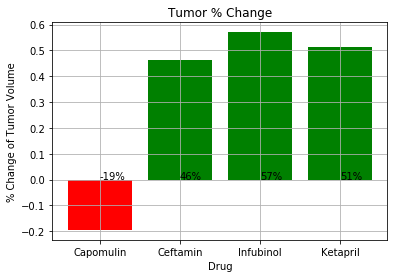

In [139]:

#Plot Chart
drugs=['Capomulin','Ceftamin','Infubinol','Ketapril']
plt.bar(drugs, percent_change, 
        color = ["green" if x > 0 else "red" for x in percent_change])

x=0
for i in percent_change:
    plt.text(0+x,0,s= f"{i*100:.00f}%") 
    x=x+1

#Chart Formatting 
plt.ylabel('% Change of Tumor Volume')
plt.xlabel('Drug')
plt.title('Tumor % Change')
plt.grid()